
# Feature Engineering with the Iris Dataset

## Problem Statement
A botanical research team is conducting a comprehensive analysis of iris flowers, aiming to derive valuable insights from their characteristics. The team wants to explore feature engineering techniques to understand and visualize the relationships within the Iris dataset.

## Objectives
1. Understand the Dataset: Get familiar with the Iris dataset and its features
2. Engineer Features: Create new features like the sepal and petal areas
3. Transform Variables: If the features are not normally distributed, apply transformations
4. Scale Features: Use Min-max scaling or standard scaling to scale the features
5. Encode Labels: Convert the categorical data (species) into numerical data using label encoding
6. One Hot Encoding: Apply one-hot encoding to the species feature and compare it with label encoding

In [1]:
## Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
## Step 2: Load and Understand the Dataset

# Load the Iris dataset
# Load the Iris dataset from your specific path
df = pd.read_csv(r"C:\Users\jim\OneDrive\Desktop\AMJ Group\Teaching\Class Materials\Dell_GenAI\Applied_Data_Science_With_Python_ILT_Materials_Sept_24\Datasets\Lesson_10_Feature_Engineering\Assisted_Ptactice_Dataset\Iris.csv")

print("Dataset Shape:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)

print("First 5 rows:")
df.head()

print("Dataset Information:")
df.info()

print("\nDescriptive Statistics:")
df.describe()

print("Species Distribution:")
species_counts = df['species'].value_counts()
print(species_counts)

Dataset Shape: (150, 5)

Column Names and Data Types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
First 5 rows:
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Descriptive Statistics:
Species Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


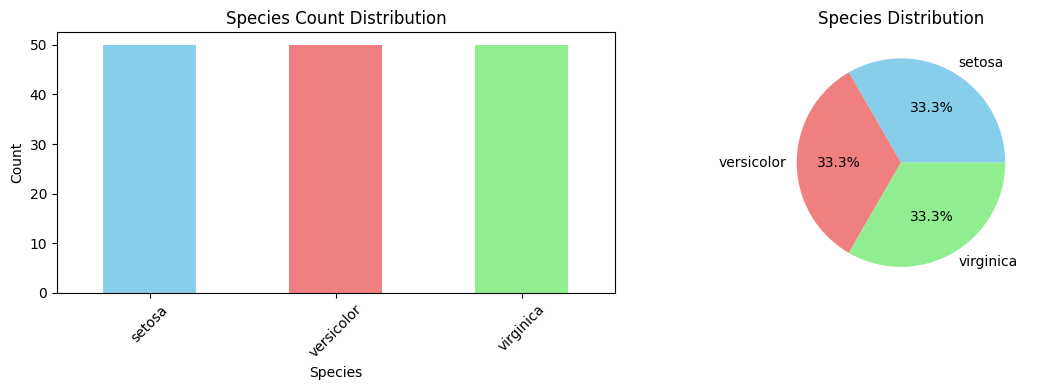

In [3]:
# Visualize species distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

species_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral', 'lightgreen'])
ax1.set_title('Species Count Distribution')
ax1.set_xlabel('Species')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

ax2.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral', 'lightgreen'])
ax2.set_title('Species Distribution')

plt.tight_layout()
plt.show()


## Step 3: Feature Engineering - Creating New Features

Feature engineering involves creating new variables from existing ones to capture additional patterns or relationships in the data.

In [4]:
# Check if original df exists and has data
print("Original df shape:", df.shape)
print("Original df columns:", df.columns.tolist())
print("\nFirst few rows of original df:")
print(df.head())

Original df shape: (150, 5)
Original df columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First few rows of original df:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
# Create a copy of the original dataset
df_engineered = df.copy()

In [6]:
# Calculate areas (length × width)
df_engineered['sepal_area'] = df_engineered['sepal_length'] * df_engineered['sepal_width']
df_engineered['petal_area'] = df_engineered['petal_length'] * df_engineered['petal_width']

print("Created area features:")
print("- sepal_area")
print("- petal_area")

print("\nFirst 5 rows showing area calculations:")
print(df_engineered[['sepal_length', 'sepal_width', 'sepal_area', 
                     'petal_length', 'petal_width', 'petal_area']].head())

Created area features:
- sepal_area
- petal_area

First 5 rows showing area calculations:
   sepal_length  sepal_width  sepal_area  petal_length  petal_width  \
0           5.1          3.5       17.85           1.4          0.2   
1           4.9          3.0       14.70           1.4          0.2   
2           4.7          3.2       15.04           1.3          0.2   
3           4.6          3.1       14.26           1.5          0.2   
4           5.0          3.6       18.00           1.4          0.2   

   petal_area  
0        0.28  
1        0.28  
2        0.26  
3        0.30  
4        0.28  


In [7]:
# Calculate ratios (aspect ratios)
df_engineered['sepal_ratio'] = df_engineered['sepal_length'] / df_engineered['sepal_width']
df_engineered['petal_ratio'] = df_engineered['petal_length'] / df_engineered['petal_width']

print("Created ratio features:")
print("- sepal_ratio (length/width)")
print("- petal_ratio (length/width)")

print("\nFirst 5 rows showing ratio calculations:")
print(df_engineered[['sepal_length', 'sepal_width', 'sepal_ratio', 
                     'petal_length', 'petal_width', 'petal_ratio']].head())

Created ratio features:
- sepal_ratio (length/width)
- petal_ratio (length/width)

First 5 rows showing ratio calculations:
   sepal_length  sepal_width  sepal_ratio  petal_length  petal_width  \
0           5.1          3.5     1.457143           1.4          0.2   
1           4.9          3.0     1.633333           1.4          0.2   
2           4.7          3.2     1.468750           1.3          0.2   
3           4.6          3.1     1.483871           1.5          0.2   
4           5.0          3.6     1.388889           1.4          0.2   

   petal_ratio  
0          7.0  
1          7.0  
2          6.5  
3          7.5  
4          7.0  


In [8]:
# Calculate total measurements
df_engineered['total_length'] = df_engineered['sepal_length'] + df_engineered['petal_length']
df_engineered['total_width'] = df_engineered['sepal_width'] + df_engineered['petal_width']
df_engineered['total_area'] = df_engineered['sepal_area'] + df_engineered['petal_area']

print("Created total measurement features:")
print("- total_length")
print("- total_width")
print("- total_area")

Created total measurement features:
- total_length
- total_width
- total_area


In [9]:
# Calculate relative sizes
df_engineered['sepal_to_petal_length'] = df_engineered['sepal_length'] / df_engineered['petal_length']
df_engineered['sepal_to_petal_width'] = df_engineered['sepal_width'] / df_engineered['petal_width']

print("Created relative size features:")
print("- sepal_to_petal_length")
print("- sepal_to_petal_width")

Created relative size features:
- sepal_to_petal_length
- sepal_to_petal_width


In [10]:
# Calculate ratios (aspect ratios)
df_engineered['sepal_ratio'] = df_engineered['sepal_length'] / df_engineered['sepal_width']
df_engineered['petal_ratio'] = df_engineered['petal_length'] / df_engineered['petal_width']

print("Created ratio features:")
print("- sepal_ratio (length/width)")
print("- petal_ratio (length/width)")

print("\nFirst 5 rows showing ratio calculations:")
print(df_engineered[['sepal_length', 'sepal_width', 'sepal_ratio', 
                     'petal_length', 'petal_width', 'petal_ratio']].head())

Created ratio features:
- sepal_ratio (length/width)
- petal_ratio (length/width)

First 5 rows showing ratio calculations:
   sepal_length  sepal_width  sepal_ratio  petal_length  petal_width  \
0           5.1          3.5     1.457143           1.4          0.2   
1           4.9          3.0     1.633333           1.4          0.2   
2           4.7          3.2     1.468750           1.3          0.2   
3           4.6          3.1     1.483871           1.5          0.2   
4           5.0          3.6     1.388889           1.4          0.2   

   petal_ratio  
0          7.0  
1          7.0  
2          6.5  
3          7.5  
4          7.0  


In [11]:
# Calculate total measurements
df_engineered['total_length'] = df_engineered['sepal_length'] + df_engineered['petal_length']
df_engineered['total_width'] = df_engineered['sepal_width'] + df_engineered['petal_width']
df_engineered['total_area'] = df_engineered['sepal_area'] + df_engineered['petal_area']

print("Created total measurement features:")
print("- total_length")
print("- total_width")
print("- total_area")

print("\nNote: These total features may have high correlation with original features.")
print("total_area represents actual biological area, while total_length/width are more abstract.")
print("In practice, evaluate discriminative power before including all features.")

print("\nFirst 5 rows showing total calculations:")
print(df_engineered[['sepal_length', 'petal_length', 'total_length',
                     'sepal_width', 'petal_width', 'total_width',
                     'sepal_area', 'petal_area', 'total_area']].head())

Created total measurement features:
- total_length
- total_width
- total_area

Note: These total features may have high correlation with original features.
total_area represents actual biological area, while total_length/width are more abstract.
In practice, evaluate discriminative power before including all features.

First 5 rows showing total calculations:
   sepal_length  petal_length  total_length  sepal_width  petal_width  \
0           5.1           1.4           6.5          3.5          0.2   
1           4.9           1.4           6.3          3.0          0.2   
2           4.7           1.3           6.0          3.2          0.2   
3           4.6           1.5           6.1          3.1          0.2   
4           5.0           1.4           6.4          3.6          0.2   

   total_width  sepal_area  petal_area  total_area  
0          3.7       17.85        0.28       18.13  
1          3.2       14.70        0.28       14.98  
2          3.4       15.04        0.26  

In [12]:
# Calculate relative sizes
df_engineered['sepal_to_petal_length'] = df_engineered['sepal_length'] / df_engineered['petal_length']
df_engineered['sepal_to_petal_width'] = df_engineered['sepal_width'] / df_engineered['petal_width']

print("Created relative size features:")
print("- sepal_to_petal_length")
print("- sepal_to_petal_width")

print("\nFirst 5 rows showing relative size calculations:")
print(df_engineered[['sepal_length', 'petal_length', 'sepal_to_petal_length',
                     'sepal_width', 'petal_width', 'sepal_to_petal_width']].head())

Created relative size features:
- sepal_to_petal_length
- sepal_to_petal_width

First 5 rows showing relative size calculations:
   sepal_length  petal_length  sepal_to_petal_length  sepal_width  \
0           5.1           1.4               3.642857          3.5   
1           4.9           1.4               3.500000          3.0   
2           4.7           1.3               3.615385          3.2   
3           4.6           1.5               3.066667          3.1   
4           5.0           1.4               3.571429          3.6   

   petal_width  sepal_to_petal_width  
0          0.2                  17.5  
1          0.2                  15.0  
2          0.2                  16.0  
3          0.2                  15.5  
4          0.2                  18.0  


In [13]:
### Visualizing Engineered Features

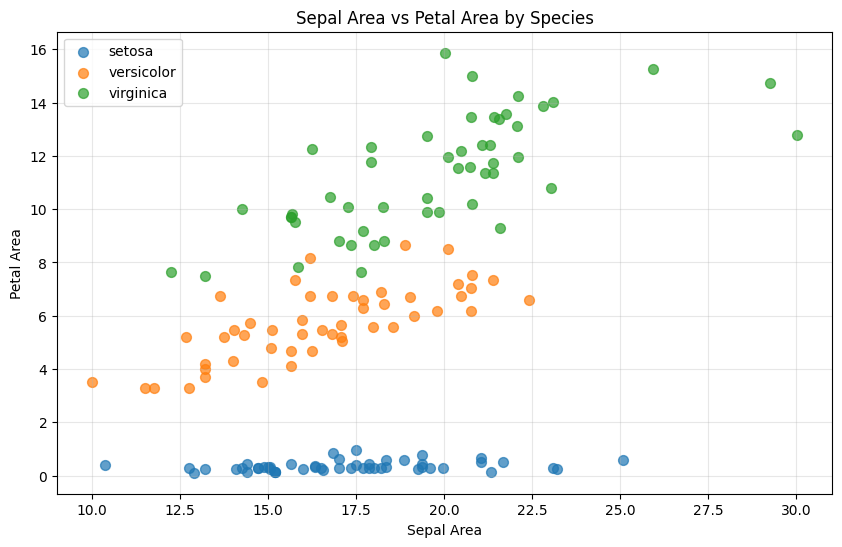

In [14]:
# Visualize sepal vs petal areas by species
plt.figure(figsize=(10, 6))
for species in df_engineered['species'].unique():
    species_data = df_engineered[df_engineered['species'] == species]
    plt.scatter(species_data['sepal_area'], species_data['petal_area'], 
               label=species, alpha=0.7, s=50)

plt.xlabel('Sepal Area')
plt.ylabel('Petal Area')
plt.title('Sepal Area vs Petal Area by Species')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


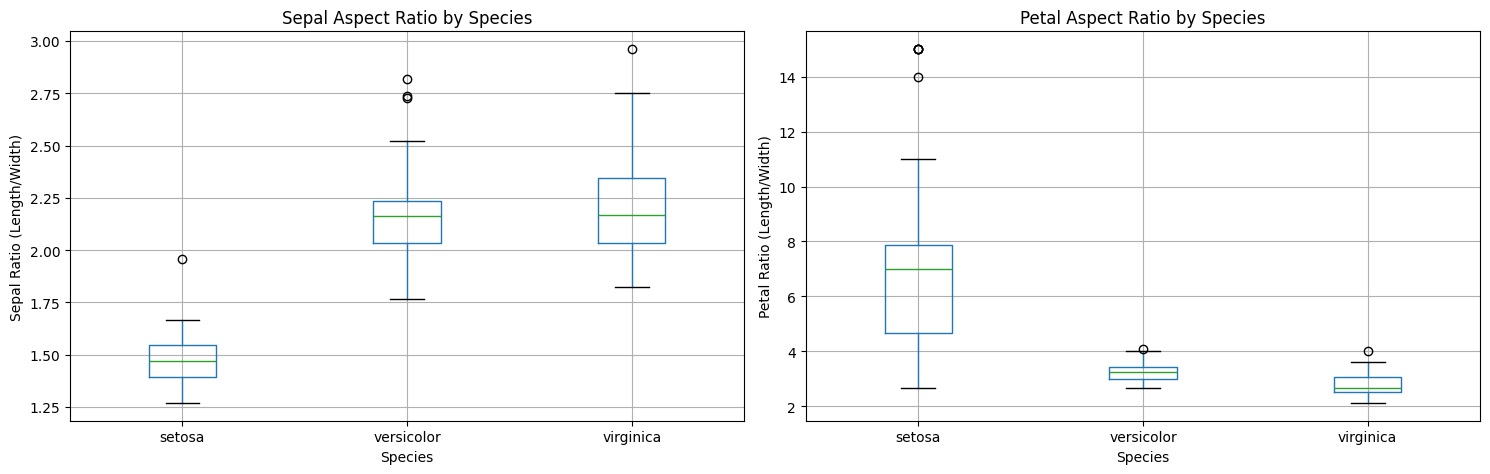

In [15]:
# Visualize aspect ratios distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

df_engineered.boxplot(column='sepal_ratio', by='species', ax=ax1)
ax1.set_title('Sepal Aspect Ratio by Species')
ax1.set_xlabel('Species')
ax1.set_ylabel('Sepal Ratio (Length/Width)')

df_engineered.boxplot(column='petal_ratio', by='species', ax=ax2)
ax2.set_title('Petal Aspect Ratio by Species')
ax2.set_xlabel('Species')
ax2.set_ylabel('Petal Ratio (Length/Width)')

plt.suptitle('')
plt.tight_layout()
plt.show()

## Step 4: Analyzing Data Distributions

Before applying transformations, we need to understand the distribution of our features.

In [16]:
# Select numerical features for analysis
numerical_features = df_engineered.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features to analyze ({len(numerical_features)}):")
for i, feature in enumerate(numerical_features, 1):
    print(f"{i}. {feature}")

Numerical features to analyze (13):
1. sepal_length
2. sepal_width
3. petal_length
4. petal_width
5. sepal_area
6. petal_area
7. sepal_ratio
8. petal_ratio
9. total_length
10. total_width
11. total_area
12. sepal_to_petal_length
13. sepal_to_petal_width


In [18]:
# Calculate skewness for each numerical feature
skewness_data = []
for feature in numerical_features:
    skew_value = df_engineered[feature].skew()
    skewness_data.append({'Feature': feature, 'Skewness': skew_value})
    
skewness_df = pd.DataFrame(skewness_data)
skewness_df = skewness_df.sort_values('Skewness', key=abs, ascending=False)

print("Skewness Analysis (sorted by absolute skewness):")
print(skewness_df.round(4))

Skewness Analysis (sorted by absolute skewness):
                  Feature  Skewness
7             petal_ratio    2.3683
12   sepal_to_petal_width    1.6911
11  sepal_to_petal_length    0.8686
10             total_area    0.5842
4              sepal_area    0.4997
9             total_width    0.3431
1             sepal_width    0.3341
0            sepal_length    0.3149
2            petal_length   -0.2745
5              petal_area    0.2666
3             petal_width   -0.1050
8            total_length   -0.0922
6             sepal_ratio    0.0245


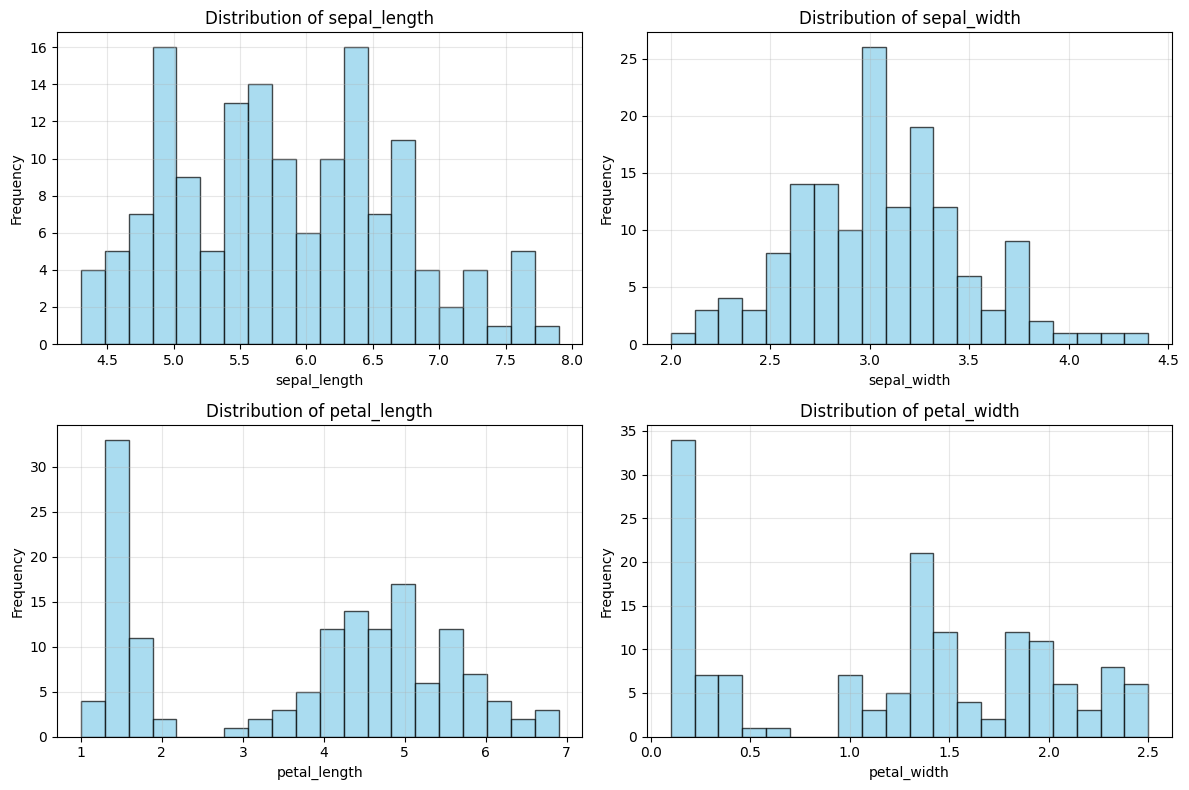

In [19]:
# Visualize distributions of original features
original_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(original_features):
    axes[i].hist(df_engineered[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

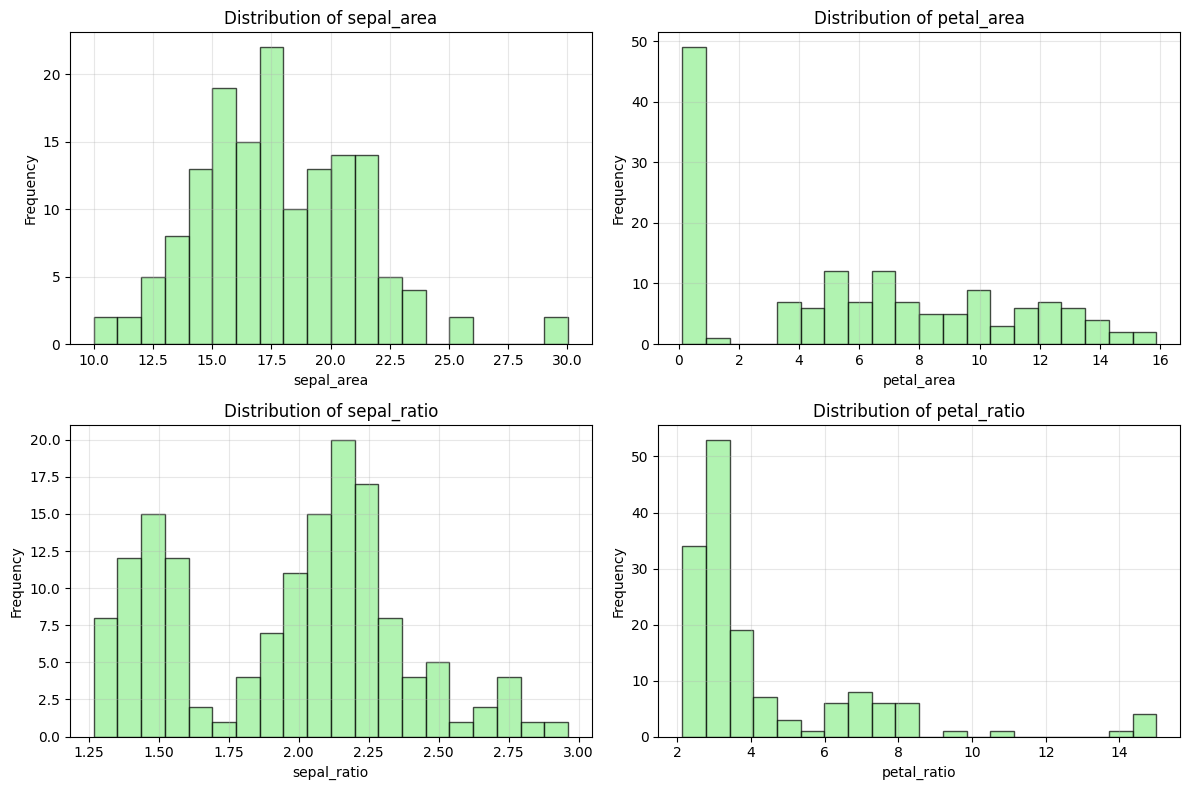

In [20]:
# Visualize distributions of engineered features
engineered_features = ['sepal_area', 'petal_area', 'sepal_ratio', 'petal_ratio']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(engineered_features):
    axes[i].hist(df_engineered[feature], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Variable Transformations

We will apply transformations to features with high skewness to improve their distribution properties.

In [21]:
# Identify highly skewed features
highly_skewed = skewness_df[abs(skewness_df['Skewness']) > 0.5]['Feature'].tolist()
print(f"Features with high skewness (|skewness| > 0.5): {len(highly_skewed)} features")
for feature in highly_skewed:
    skew_val = skewness_df[skewness_df['Feature'] == feature]['Skewness'].iloc[0]
    print(f"- {feature}: {skew_val:.3f}")

Features with high skewness (|skewness| > 0.5): 4 features
- petal_ratio: 2.368
- sepal_to_petal_width: 1.691
- sepal_to_petal_length: 0.869
- total_area: 0.584


In [22]:
df_transformed = df_engineered.copy()
transformation_results = {}

# Apply transformations to highly skewed features
for feature in highly_skewed:
    if feature in df_transformed.columns and df_transformed[feature].min() > 0:
        # Log transformation
        df_transformed[f'{feature}_log'] = np.log(df_transformed[feature])
        
        # Square root transformation
        df_transformed[f'{feature}_sqrt'] = np.sqrt(df_transformed[feature])
        
        # Box-Cox transformation
        try:
            df_transformed[f'{feature}_boxcox'], lambda_val = boxcox(df_transformed[feature])
            transformation_results[feature] = {
                'original_skew': df_transformed[feature].skew(),
                'log_skew': df_transformed[f'{feature}_log'].skew(),
                'sqrt_skew': df_transformed[f'{feature}_sqrt'].skew(),
                'boxcox_skew': df_transformed[f'{feature}_boxcox'].skew(),
                'boxcox_lambda': lambda_val
            }
        except Exception as e:
            print(f"Box-Cox transformation failed for {feature}: {e}")

print(f"Applied transformations to {len(transformation_results)} features")

Applied transformations to 4 features


In [23]:
# Display transformation results
if transformation_results:
    print("Transformation Results (Skewness Comparison):")
    results_df = pd.DataFrame(transformation_results).T
    print(results_df.round(4))
else:
    print("No transformations applied - features have acceptable skewness or contain non-positive values.")

Transformation Results (Skewness Comparison):
                       original_skew  log_skew  sqrt_skew  boxcox_skew  \
petal_ratio                   2.3683    1.2574     1.7543       0.2480   
sepal_to_petal_width          1.6911    0.7798     1.1089       0.4309   
sepal_to_petal_length         0.8686    0.6849     0.7704       0.4164   
total_area                    0.5842    0.0260     0.3044       0.0029   

                       boxcox_lambda  
petal_ratio                  -1.4202  
sepal_to_petal_width         -0.6961  
sepal_to_petal_length        -1.4690  
total_area                   -0.0411  


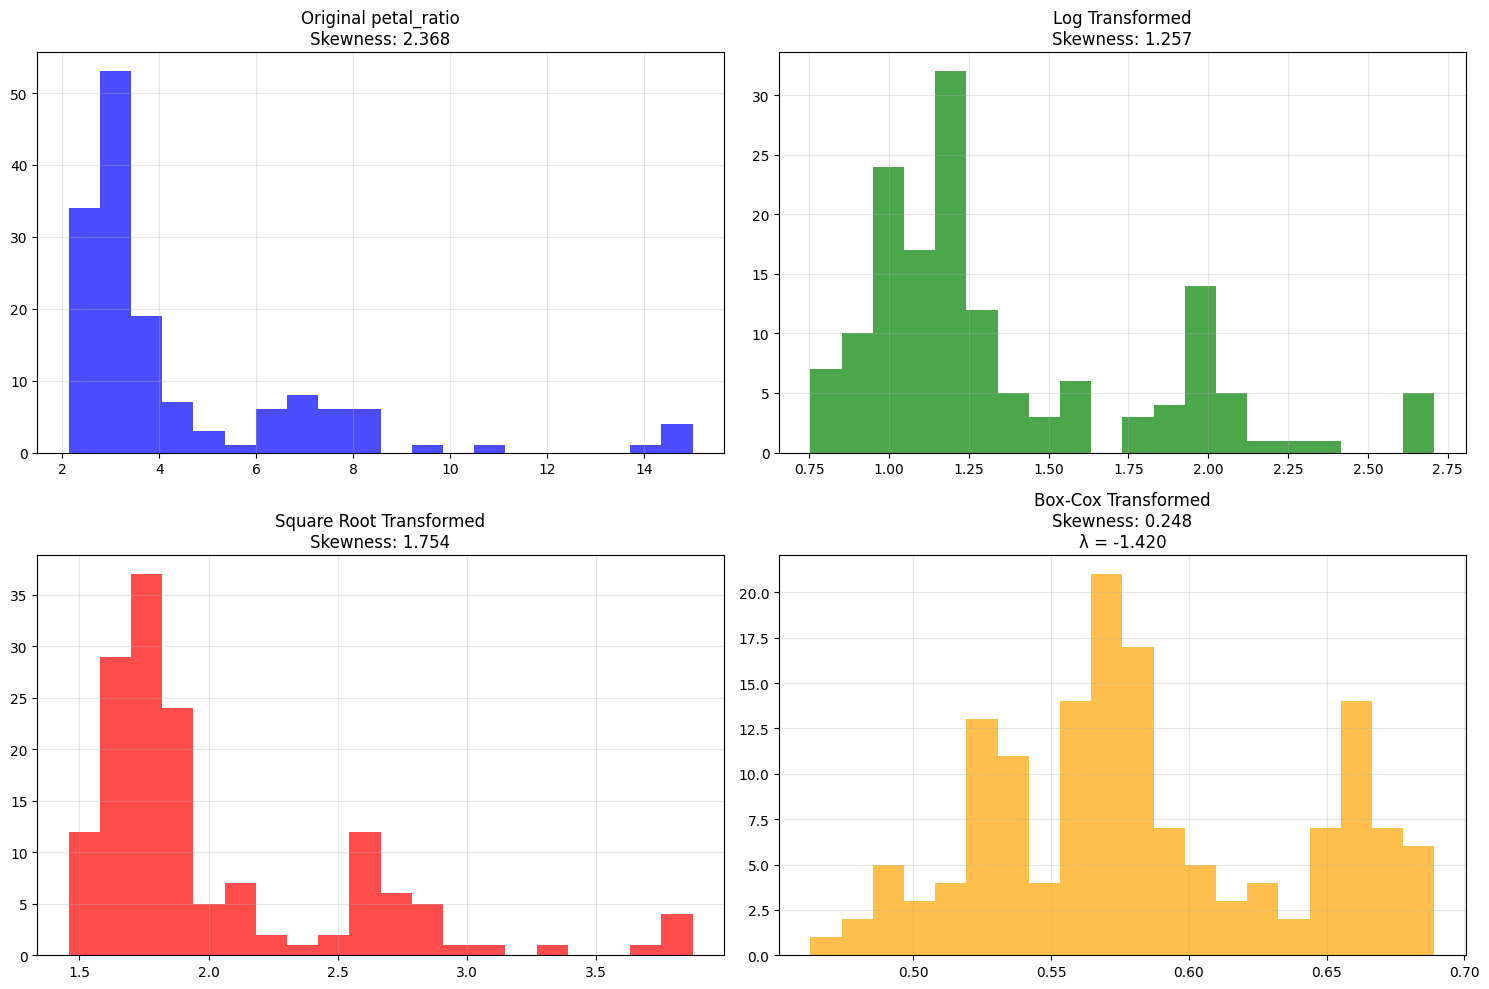

In [24]:
# Visualize transformations for the most skewed feature
if transformation_results:
    most_skewed_feature = max(transformation_results.keys(), 
                             key=lambda x: abs(transformation_results[x]['original_skew']))
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Original distribution
    axes[0, 0].hist(df_transformed[most_skewed_feature], bins=20, alpha=0.7, color='blue')
    axes[0, 0].set_title(f'Original {most_skewed_feature}\nSkewness: {transformation_results[most_skewed_feature]["original_skew"]:.3f}')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Log transformation
    axes[0, 1].hist(df_transformed[f'{most_skewed_feature}_log'], bins=20, alpha=0.7, color='green')
    axes[0, 1].set_title(f'Log Transformed\nSkewness: {transformation_results[most_skewed_feature]["log_skew"]:.3f}')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Square root transformation
    axes[1, 0].hist(df_transformed[f'{most_skewed_feature}_sqrt'], bins=20, alpha=0.7, color='red')
    axes[1, 0].set_title(f'Square Root Transformed\nSkewness: {transformation_results[most_skewed_feature]["sqrt_skew"]:.3f}')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Box-Cox transformation
    if f'{most_skewed_feature}_boxcox' in df_transformed.columns:
        axes[1, 1].hist(df_transformed[f'{most_skewed_feature}_boxcox'], bins=20, alpha=0.7, color='orange')
        axes[1, 1].set_title(f'Box-Cox Transformed\nSkewness: {transformation_results[most_skewed_feature]["boxcox_skew"]:.3f}\nλ = {transformation_results[most_skewed_feature]["boxcox_lambda"]:.3f}')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No transformations to visualize.")

## Step 6: Feature Scaling

Feature scaling standardizes the range of features, which is essential for many machine learning algorithms.

In [25]:
# Select features for scaling
original_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
engineered_features = ['sepal_area', 'petal_area', 'sepal_ratio', 'petal_ratio', 
                      'total_length', 'total_width', 'total_area']

features_to_scale = original_features + engineered_features
print(f"Features selected for scaling ({len(features_to_scale)}):")
for feature in features_to_scale:
    print(f"- {feature}")

print("Original Feature Statistics:")
print(df_engineered[features_to_scale].describe().round(3))

# Min-Max Scaling (0 to 1)
df_minmax = df_engineered.copy()
minmax_scaler = MinMaxScaler()
df_minmax[features_to_scale] = minmax_scaler.fit_transform(df_minmax[features_to_scale])

print("Min-Max Scaled Features (0-1):")
print(df_minmax[features_to_scale].describe().round(3))

# Standard Scaling (mean=0, std=1)
df_standard = df_engineered.copy()
standard_scaler = StandardScaler()
df_standard[features_to_scale] = standard_scaler.fit_transform(df_standard[features_to_scale])

print("Standard Scaled Features (mean=0, std=1):")
print(df_standard[features_to_scale].describe().round(3))

Features selected for scaling (11):
- sepal_length
- sepal_width
- petal_length
- petal_width
- sepal_area
- petal_area
- sepal_ratio
- petal_ratio
- total_length
- total_width
- total_area
Original Feature Statistics:
       sepal_length  sepal_width  petal_length  petal_width  sepal_area  \
count       150.000      150.000       150.000      150.000     150.000   
mean          5.843        3.054         3.759        1.199      17.807   
std           0.828        0.434         1.764        0.763       3.369   
min           4.300        2.000         1.000        0.100      10.000   
25%           5.100        2.800         1.600        0.300      15.645   
50%           5.800        3.000         4.350        1.300      17.660   
75%           6.400        3.300         5.100        1.800      20.325   
max           7.900        4.400         6.900        2.500      30.020   

       petal_area  sepal_ratio  petal_ratio  total_length  total_width  \
count     150.000      150.000 

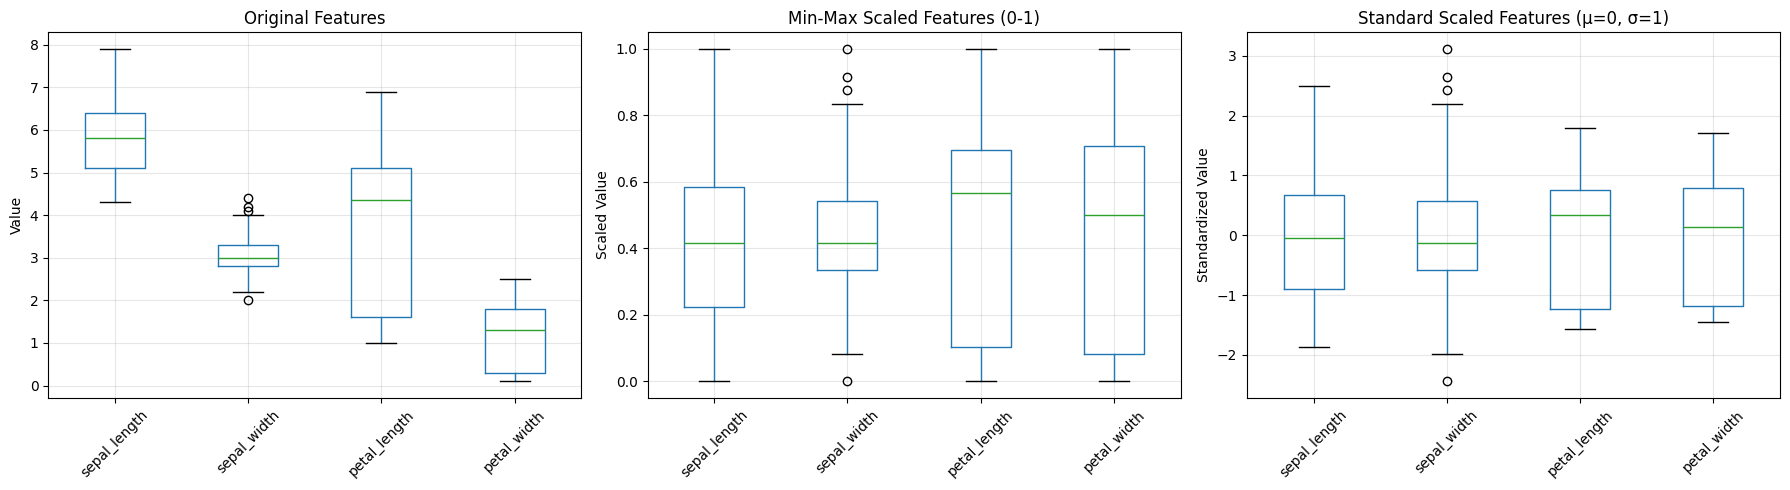

In [26]:
# Visualize the effect of scaling
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data
df_engineered[original_features].boxplot(ax=axes[0])
axes[0].set_title('Original Features')
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Min-Max scaled data
df_minmax[original_features].boxplot(ax=axes[1])
axes[1].set_title('Min-Max Scaled Features (0-1)')
axes[1].set_ylabel('Scaled Value')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Standard scaled data
df_standard[original_features].boxplot(ax=axes[2])
axes[2].set_title('Standard Scaled Features (μ=0, σ=1)')
axes[2].set_ylabel('Standardized Value')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 7: Label Encoding

Label encoding converts categorical variables into numerical format by assigning each unique category an integer value.

In [27]:
# Create a copy for label encoding (using Min-Max scaled data)
df_label_encoded = df_minmax.copy()

# Apply Label Encoding to species
label_encoder = LabelEncoder()
df_label_encoded['species_encoded'] = label_encoder.fit_transform(df_label_encoded['species'])

print("Label Encoding Applied Successfully!")
print(f"New column created: species_encoded")

# Display the mapping
print("Label Encoding Mapping:")
species_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for species, code in species_mapping.items():
    print(f"{species} -> {code}")

# Show comparison of original and encoded species
print("Comparison of Original and Encoded Species:")
comparison = df_label_encoded[['species', 'species_encoded']].drop_duplicates().sort_values('species_encoded')
print(comparison)

print("\nEncoded Species Distribution:")
print(df_label_encoded['species_encoded'].value_counts().sort_index())

Label Encoding Applied Successfully!
New column created: species_encoded
Label Encoding Mapping:
setosa -> 0
versicolor -> 1
virginica -> 2
Comparison of Original and Encoded Species:
        species  species_encoded
0        setosa                0
50   versicolor                1
100   virginica                2

Encoded Species Distribution:
species_encoded
0    50
1    50
2    50
Name: count, dtype: int64


## Step 8: One-Hot Encoding

One-hot encoding creates binary columns for each category, where only one column is 'hot' (1) for each observation.

In [28]:
# Create a copy for one-hot encoding (using Min-Max scaled data)
df_onehot = df_minmax.copy()

# Apply One-Hot Encoding to species
species_onehot = pd.get_dummies(df_onehot['species'], prefix='species')
df_onehot = pd.concat([df_onehot, species_onehot], axis=1)

print("One-Hot Encoding Applied Successfully!")
onehot_columns = [col for col in df_onehot.columns if col.startswith('species_')]
print(f"New columns created ({len(onehot_columns)}):")
for col in onehot_columns:
    print(f"- {col}")

print("First 10 rows of One-Hot Encoded Species:")
print(df_onehot[['species'] + onehot_columns].head(10))

# Verify one-hot encoding (each row should sum to 1)
onehot_sum = df_onehot[onehot_columns].sum(axis=1)
print(f"Verification: All row sums equal 1? {all(onehot_sum == 1)}")
print(f"Row sums distribution: {onehot_sum.value_counts().sort_index()}")

One-Hot Encoding Applied Successfully!
New columns created (3):
- species_setosa
- species_versicolor
- species_virginica
First 10 rows of One-Hot Encoded Species:
  species  species_setosa  species_versicolor  species_virginica
0  setosa            True               False              False
1  setosa            True               False              False
2  setosa            True               False              False
3  setosa            True               False              False
4  setosa            True               False              False
5  setosa            True               False              False
6  setosa            True               False              False
7  setosa            True               False              False
8  setosa            True               False              False
9  setosa            True               False              False
Verification: All row sums equal 1? True
Row sums distribution: 1    150
Name: count, dtype: int64


## Step 9: Comparison of Encoding Methods

Let's compare the advantages and disadvantages of label encoding versus one-hot encoding.

In [29]:
# Compare dataset dimensions
print("Dataset Dimension Comparison:")
print(f"Original dataset: {df.shape}")
print(f"With Label Encoding: {df_label_encoded.shape}")
print(f"With One-Hot Encoding: {df_onehot.shape}")

print("\nMemory Usage Comparison:")
print(f"Label Encoded dataset: {df_label_encoded.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"One-Hot Encoded dataset: {df_onehot.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Feature correlation analysis
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

print("Correlation with Target Variable:")
print("\nLabel Encoding Correlations:")
label_correlations = df_label_encoded[feature_cols + ['species_encoded']].corr()['species_encoded'].drop('species_encoded')
print(label_correlations.round(3))

print("One-Hot Encoding Correlations:")
for species_col in onehot_columns:
    correlations = df_onehot[feature_cols + [species_col]].corr()[species_col].drop(species_col)
    print(f"\n{species_col}:")
    print(correlations.round(3))

Dataset Dimension Comparison:
Original dataset: (150, 5)
With Label Encoding: (150, 15)
With One-Hot Encoding: (150, 17)

Memory Usage Comparison:
Label Encoded dataset: 26.11 KB
One-Hot Encoded dataset: 25.37 KB
Correlation with Target Variable:

Label Encoding Correlations:
sepal_length    0.783
sepal_width    -0.419
petal_length    0.949
petal_width     0.956
Name: species_encoded, dtype: float64
One-Hot Encoding Correlations:

species_setosa:
sepal_length   -0.717
sepal_width     0.596
petal_length   -0.923
petal_width    -0.888
Name: species_setosa, dtype: float64

species_versicolor:
sepal_length    0.079
sepal_width    -0.465
petal_length    0.202
petal_width     0.118
Name: species_versicolor, dtype: float64

species_virginica:
sepal_length    0.638
sepal_width    -0.131
petal_length    0.721
petal_width     0.769
Name: species_virginica, dtype: float64


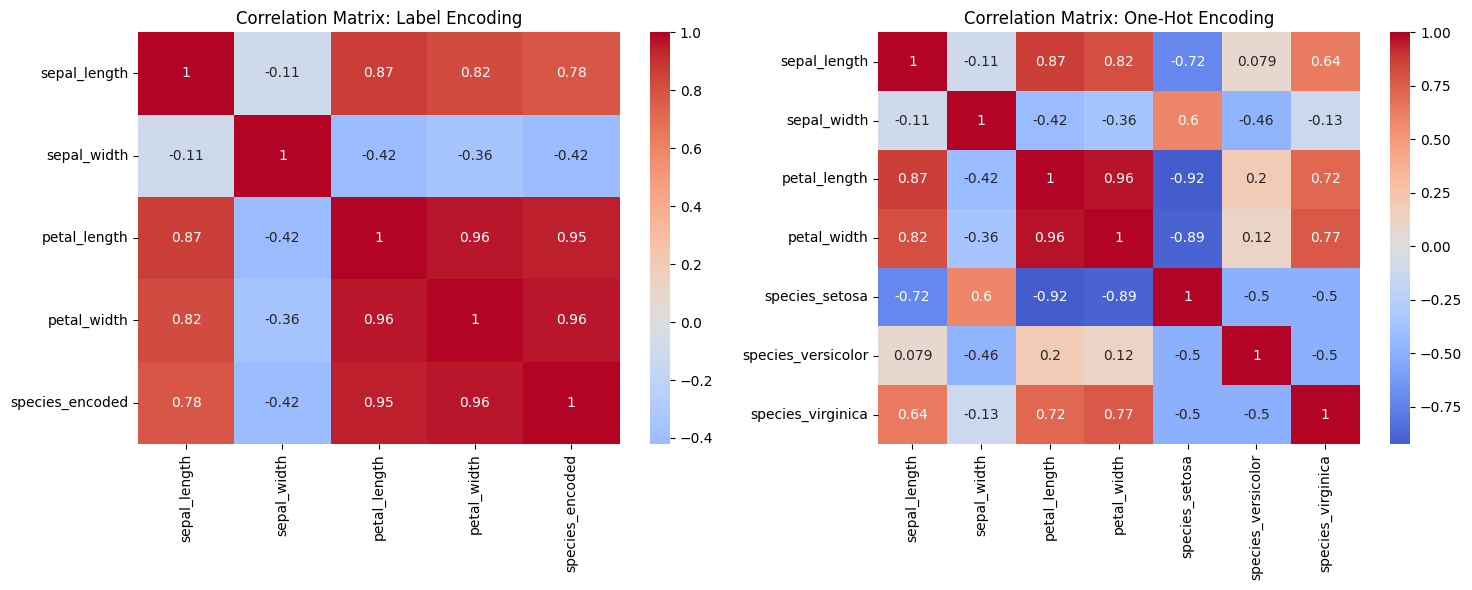

In [30]:
# Visualize correlation matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Correlation heatmap for label encoding
label_corr_matrix = df_label_encoded[feature_cols + ['species_encoded']].corr()
sns.heatmap(label_corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax1)
ax1.set_title('Correlation Matrix: Label Encoding')

# Correlation heatmap for one-hot encoding
onehot_corr_matrix = df_onehot[feature_cols + onehot_columns].corr()
sns.heatmap(onehot_corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax2)
ax2.set_title('Correlation Matrix: One-Hot Encoding')

plt.tight_layout()
plt.show()

In [ ]:
## Step 10: Final Summary and Recommendations

In [31]:
# Analyze most informative engineered features
engineered_only = ['sepal_area', 'petal_area', 'sepal_ratio', 'petal_ratio', 
                   'total_length', 'total_width', 'total_area']

print("Top Engineered Features by Species Correlation:")
engineered_correlations = df_label_encoded[engineered_only + ['species_encoded']].corr()['species_encoded'].drop('species_encoded')
top_engineered = engineered_correlations.abs().sort_values(ascending=False)
print(top_engineered.round(4))

Top Engineered Features by Species Correlation:
petal_area      0.9501
total_length    0.9219
total_area      0.7915
sepal_ratio     0.7766
total_width     0.7497
petal_ratio     0.6639
sepal_area      0.3010
Name: species_encoded, dtype: float64


In [33]:
# Create comprehensive summary
comparison_summary = {
    'Dataset Version': ['Original', 'Engineered Features', 'Label Encoded', 'One-Hot Encoded'],
    'Dimensions': [df.shape, df_engineered.shape, df_label_encoded.shape, df_onehot.shape],
    'Features Count': [df.shape[1], df_engineered.shape[1], df_label_encoded.shape[1], df_onehot.shape[1]],
    'Categorical Encoding': ['Original Species', 'Original Species', 'Numerical (0,1,2)', 'Binary Columns']
}

comparison_df = pd.DataFrame(comparison_summary)
print("Dataset Evolution Summary:")
print(comparison_df.to_string(index=False))

print("\n" + "="*60)
print("FEATURE ENGINEERING INSIGHTS")
print("="*60)

print(f"\n1. FEATURE ENGINEERING:")
print(f"   - Created {len(engineered_only)} new features from original measurements")
print(f"   - Most informative engineered feature: {top_engineered.index[0]} (|r| = {top_engineered.iloc[0]:.3f})")
print("   - Geometric features (areas, ratios) provide additional discriminative power")

print("\n2. ENCODING STRATEGY:")
print("   - Label Encoding: Use for ordinal relationships or tree-based algorithms")
print("   - One-Hot Encoding: Preferred for neural networks and distance-based algorithms")
print("   - One-Hot adds dimensionality but avoids artificial ordinality")

print("\n3. SCALING RECOMMENDATIONS:")
print("   - Min-Max Scaling: Use for neural networks, bounded feature ranges")
print("   - Standard Scaling: Use for algorithms assuming normal distribution")
print("   - Essential for distance-based algorithms (KNN, SVM, clustering)")

if transformation_results:
    print("\n4. TRANSFORMATIONS:")
    print("   - Applied to reduce skewness in engineered features")
    print("   - Box-Cox transformation generally provided best normality improvement")
else:
    print("\n4. TRANSFORMATIONS:")
    print("   - Original features showed acceptable distribution properties")
    print("   - Transformations may still be beneficial for specific modeling approaches")

Dataset Evolution Summary:
    Dataset Version Dimensions  Features Count Categorical Encoding
           Original   (150, 5)               5     Original Species
Engineered Features  (150, 14)              14     Original Species
      Label Encoded  (150, 15)              15    Numerical (0,1,2)
    One-Hot Encoded  (150, 17)              17       Binary Columns

FEATURE ENGINEERING INSIGHTS

1. FEATURE ENGINEERING:
   - Created 7 new features from original measurements
   - Most informative engineered feature: petal_area (|r| = 0.950)
   - Geometric features (areas, ratios) provide additional discriminative power

2. ENCODING STRATEGY:
   - Label Encoding: Use for ordinal relationships or tree-based algorithms
   - One-Hot Encoding: Preferred for neural networks and distance-based algorithms
   - One-Hot adds dimensionality but avoids artificial ordinality

3. SCALING RECOMMENDATIONS:
   - Min-Max Scaling: Use for neural networks, bounded feature ranges
   - Standard Scaling: Use fo

In [34]:
# Save the processed datasets
output_files = {
    'iris_engineered_features.csv': df_engineered,
    'iris_label_encoded.csv': df_label_encoded,
    'iris_onehot_encoded.csv': df_onehot
}

print("Saving processed datasets:")
for filename, dataset in output_files.items():
    dataset.to_csv(filename, index=False)
    print(f"Saved: {filename} - Shape: {dataset.shape}")

print("\nFeature engineering pipeline completed successfully!")

Saving processed datasets:
Saved: iris_engineered_features.csv - Shape: (150, 14)
Saved: iris_label_encoded.csv - Shape: (150, 15)
Saved: iris_onehot_encoded.csv - Shape: (150, 17)

Feature engineering pipeline completed successfully!


## Conclusion

This comprehensive feature engineering analysis demonstrates the systematic approach to preparing the Iris dataset for machine learning:

**Key Achievements:**
- Created meaningful geometric features (areas, ratios, totals) that provide additional discriminative power
- Applied appropriate transformations to improve data distribution properties
- Implemented both Min-Max and Standard scaling for algorithm compatibility
- Demonstrated both label encoding and one-hot encoding with comparative analysis

**Practical Applications:**
- The engineered features can improve model performance by capturing geometric relationships
- Proper scaling ensures fair feature contribution in distance-based algorithms
- Appropriate encoding strategy depends on the chosen machine learning algorithm

**Next Steps:**
- Apply these datasets to various machine learning algorithms
- Compare model performance across different feature engineering approaches
- Explore advanced feature selection techniques to identify optimal feature subsets